In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [9]:
# Check class balance
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

In [12]:
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

In [13]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Create and train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85284    11]
 [   37   111]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.75      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
##see that we observe an accuracy of 100%. this is due to overfitting of the classifier in the quest to reach
##a Gini Impurity Index of 0.0. This will cause the model to perform poorly in data that it has not seen due to lack
##of generalizability.

In [19]:
###Fixing the issue of overfitting through Pruning a technique of tuning hyperparamters of the model.

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from six import StringIO
import pydotplus, graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

In [21]:
%matplotlib inline

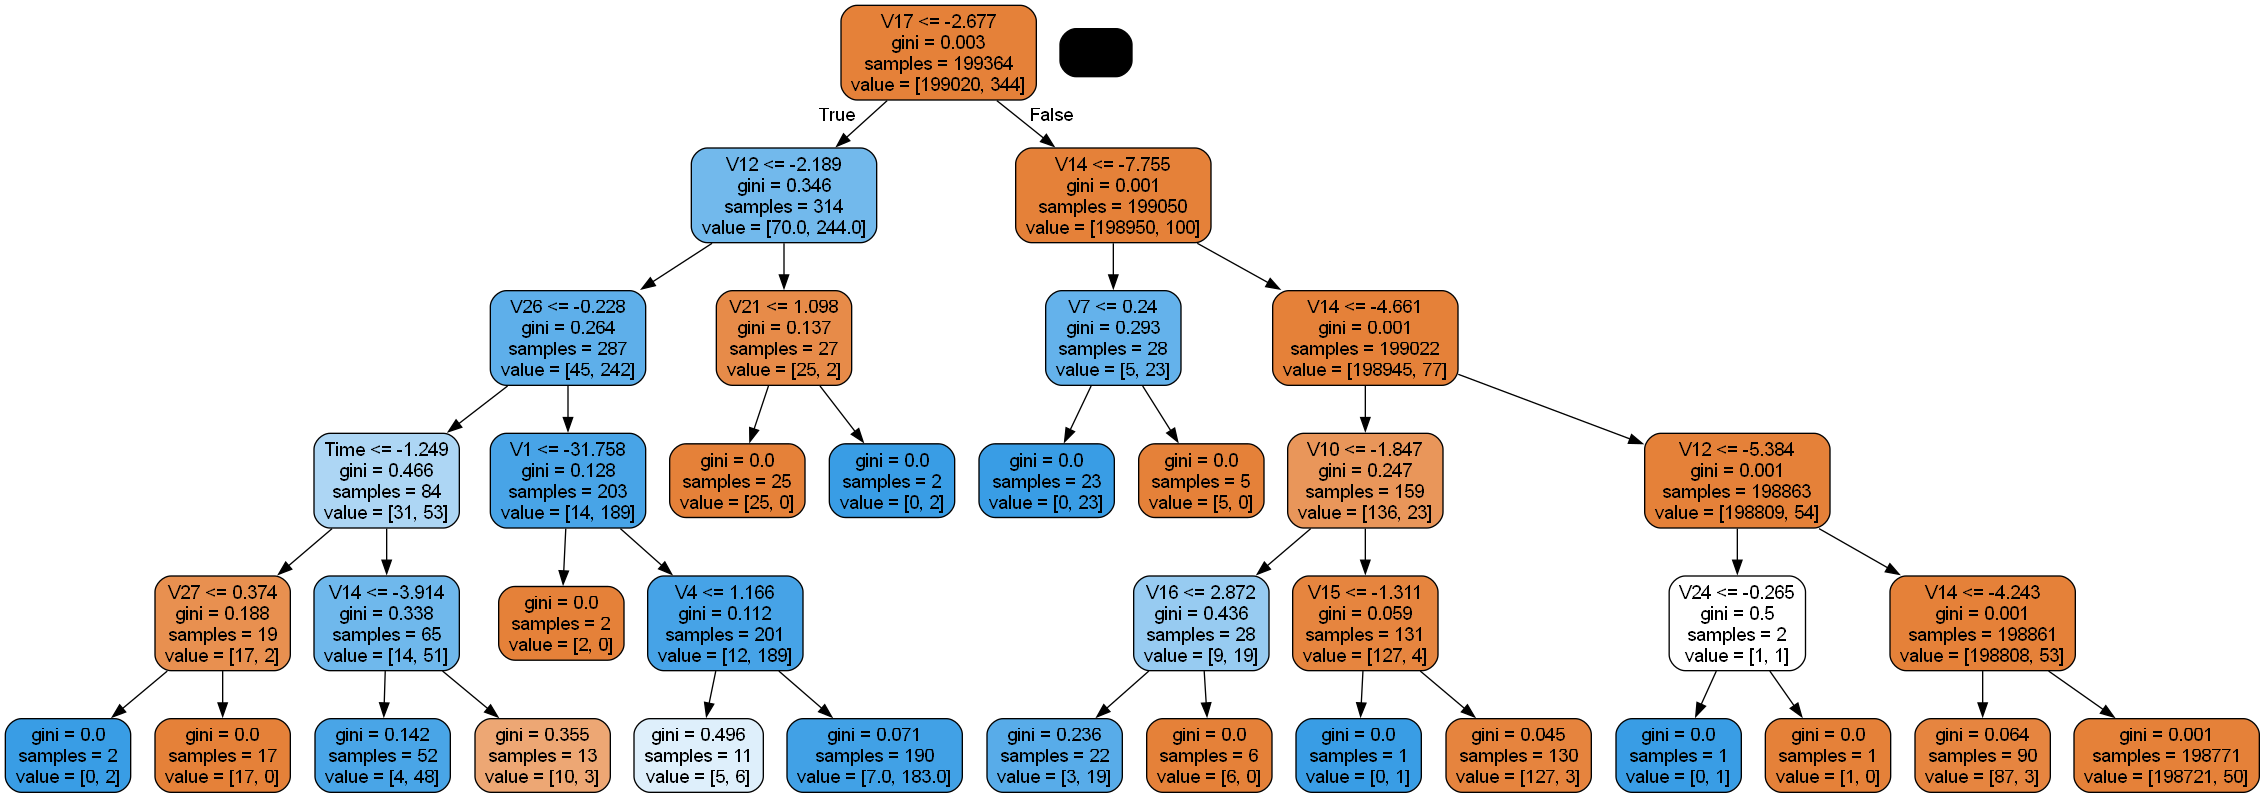

In [24]:
features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Hyperparameter tuning to correct model overfitting.
##### the decision tree classifier has the tendency to overfit to the data. Thus it tries its best to reach a gini impurity value of 0.0 which means that it tries to predict labels where there are no mixture of target values. 